## src
https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-random-forest.ipynb  


https://github.com/donnemartin/data-science-ipython-notebooks

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

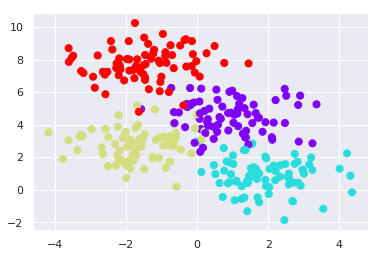

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');


In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
#visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
#visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)

from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

In [8]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
data = skd.load_boston()

In [10]:
## Random forest regressor model
reg = ske.RandomForestRegressor()

In [11]:
X = data['data']
y = data['target']

In [12]:
reg.fit(X, y)

/home/jihyun/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

Text(0.5, 1.0, 'Features importance')

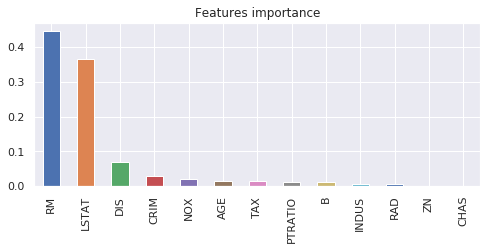

In [15]:
import pandas as pd
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
labels = data['feature_names'][fet_ind]
pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance')

Text(0, 0.5, 'Value of houses (k$)')

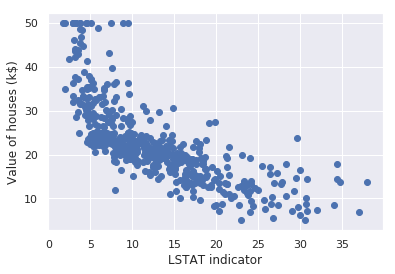

In [16]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X[:, -1], y)
ax.set_xlabel('LSTAT indicator')
ax.set_ylabel('Value of houses (k$)')

In [20]:
from sklearn import tree
tree.export_graphviz(reg.estimators_[0],
                     'tree.dot')

In [22]:
## render the image from existing dot file
from graphviz import render
render('dot', 'png', './tree.dot')  


'./tree.dot.png'